In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score

# **Pengumpulan Data**

Membaca Dataset

In [ ]:
df = pd.read_csv("/content/hasil monev banmod - 2123.xlsx - data.csv")
df

,NO,NAMA,ALAMAT,RT,RW,HP,KEL,KEC,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,KETERANGAN,NIK,JENIS KELAMIN,USIA
0,1,ADE NURALINA,PERUM DHOHO INDAH D22,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,Usaha Perdagangan Lainnya,2400000,"Tungku/kompor,cup sealer,meja lipat,jar",2120000.0,naik,pemasaran,NaN,3.57E+15,Perempuan,57
1,2,HARI IRIYANTO,SEMAMPIR1NO 82B,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,"toko (pracangan, los pasar tradisional, buku, ...",2400000,Obrok,700000.0,naik,pemasaran,NaN,3.57E+15,Laki-laki,60
2,3,JUSTINE SETIAWATI,JLN. SEMAMPIR GANG 1 NO.90,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,"rumah makan (warung, café, restoran, kedai mak...",2400000,"Wajan,dandang,kursi sendok garpu kompor panci",1927000.0,naik,pemasaran,NaN,3.57E+15,Perempuan,37
3,4,LISAKURNIA AZIZADIYATI,JL SEMAMPIR 1/82B,1.0,1.0,6.29E+12,BALOWERTI,KECAMATAN KOTA,2023,"Tambal ban, Jual Bensin Eceran",2400000,Rombong,1400000.0,tetap,Pemasaran,NaN,3.57E+15,Perempuan,21
4,5,MARIDI,JLN. SEMAMPIR 1 86B,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,Usaha Perdagangan Lainnyafashion (barang jadi ...,2400000,"kursi,kipas,setrika",940000.0,tetap,Pemasaran,NaN,3.57E+15,Laki-laki,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,11989,WAWAN DWI SANTOSO,Lingkungan Tirtoudan rt 031 rw 011 Kelurahan T...,31.0,11.0,81930002425,Tosaren,Pesantren,2022,Makanan dan Minuman,7410000,NaN,4850000.0,Tetap,Pemasaran,NaN,3.51E+15,Laki-laki,36
11989,11990,YAYUK,Jl Tosaren 2 no 65 Tosaren kota kediri,NaN,NaN,87858919996,Tosaren,Pesantren,2022,Pedagang rempah-rempah,3950000,NaN,2500000.0,NaN,NaN,NaN,3.51E+15,Perempuan,41
11990,11991,YOYOK PRAYITNO,"Perum Puri Asri 2 Blok A2 Rt 44 Rw 16,Keluraha...",44.0,16.0,85735187570,Tosaren,Pesantren,2022,Makanan dan Minuman,4730000,NaN,3000000.0,tetap,pemasaran,NaN,3.51E+15,Laki-laki,39
11991,11992,YUNI LESTARI,Tosaren RT 03 rw 01 pesantren kediri,3.0,1.0,85859670194,Tosaren,Pesantren,2022,Toko,9950000,NaN,6500000.0,NaN,NaN,NaN,3.57E+15,Perempuan,43


Statistik deskriptif dari data

In [ ]:
df.describe(include='all')

,NO,NAMA,ALAMAT,RT,RW,HP,KEL,KEC,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,KETERANGAN,NIK,JENIS KELAMIN,USIA
count,11993.000000,11993,11993,11907.000000,11907.000000,11986,11993,11993,11993.000000,11993,1.199300e+04,8017,9.252000e+03,8451,8273,40,11993,11993,11993.000000
unique,NaN,9747,9767,NaN,NaN,1365,104,10,NaN,379,NaN,6239,NaN,17,43,24,82,2,NaN
top,NaN,SULASTRI,LINGKUNGAN KRESEK,NaN,NaN,6.29E+12,POJOK,KECAMATAN MOJOROTO,NaN,"rumah makan (warung, café, restoran, kedai mak...",NaN,Etalase,NaN,tetap,Pemasaran,pindah domisili,3.57E+15,Perempuan,NaN
freq,NaN,53,96,NaN,NaN,5893,519,4414,NaN,2890,NaN,238,NaN,4553,3033,9,10393,8111,NaN
mean,5997.000000,NaN,NaN,9.202486,4.451667,NaN,NaN,NaN,2022.884849,NaN,2.962094e+06,NaN,1.999304e+06,NaN,NaN,NaN,NaN,NaN,45.039606
std,3462.225224,NaN,NaN,10.426697,3.629708,NaN,NaN,NaN,0.324142,NaN,1.815827e+06,NaN,1.511498e+06,NaN,NaN,NaN,NaN,NaN,20.938982
min,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2021.000000,NaN,1.150000e+06,NaN,2.000000e+04,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2999.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,1.080000e+06,NaN,NaN,NaN,NaN,NaN,37.000000
50%,5997.000000,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,1.750000e+06,NaN,NaN,NaN,NaN,NaN,45.000000
75%,8995.000000,NaN,NaN,13.000000,6.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,2.336625e+06,NaN,NaN,NaN,NaN,NaN,53.000000


# **Pembersihan Data (Data Cleaning)/Data Preprocessing**

Cek value yang kosong

In [ ]:
df.isnull().sum()

,0
NO,0
NAMA,0
ALAMAT,0
RT,86
RW,86
HP,7
KEL,0
KEC,0
THN DAPAT,0
JENIS USAHA,0


Drop/Hapus kolom yang tidak digunakan

In [ ]:
df = df.drop(['NO', 'NAMA', 'ALAMAT', 'RT', 'RW', 'HP', 'KEL', 'KEC', 'KETERANGAN', 'NIK'], axis=1)

Isi data kosong pada Kolom Nilai Sarpras dengan Rata-rata

In [ ]:
df['NILAI SARPRAS'] = df['NILAI SARPRAS'].fillna(df['NILAI SARPRAS'].mean())
#mengisi data kosong dengan mean/rata-rata
#digunakan pada data yang bertipe numerik

Isi data kosong pada Kolom Jenis Sarpras, Hasil Monev, Pelatihan yang diinginkan dengan Modus

In [ ]:
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].fillna(df['JENIS SARPRAS'].mode()[0])

df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].fillna(df['HASIL MONEV (OMZET)'].mode()[0])

df['PELATIHAN YANG DIINGINKAN'] = df['PELATIHAN YANG DIINGINKAN'].fillna(df['PELATIHAN YANG DIINGINKAN'].mode()[0])
#mengisi data kosong dengan modus
#hanya digunakan pada data yang bertipe string

Cek Hasil data setelah Preprocessing

In [ ]:
df.isnull().sum()

,0
THN DAPAT,0
JENIS USAHA,0
BESAR BANTUAN,0
JENIS SARPRAS,0
NILAI SARPRAS,0
HASIL MONEV (OMZET),0
PELATIHAN YANG DIINGINKAN,0
JENIS KELAMIN,0
USIA,0


Mengubah huruf kecil pada value kolom

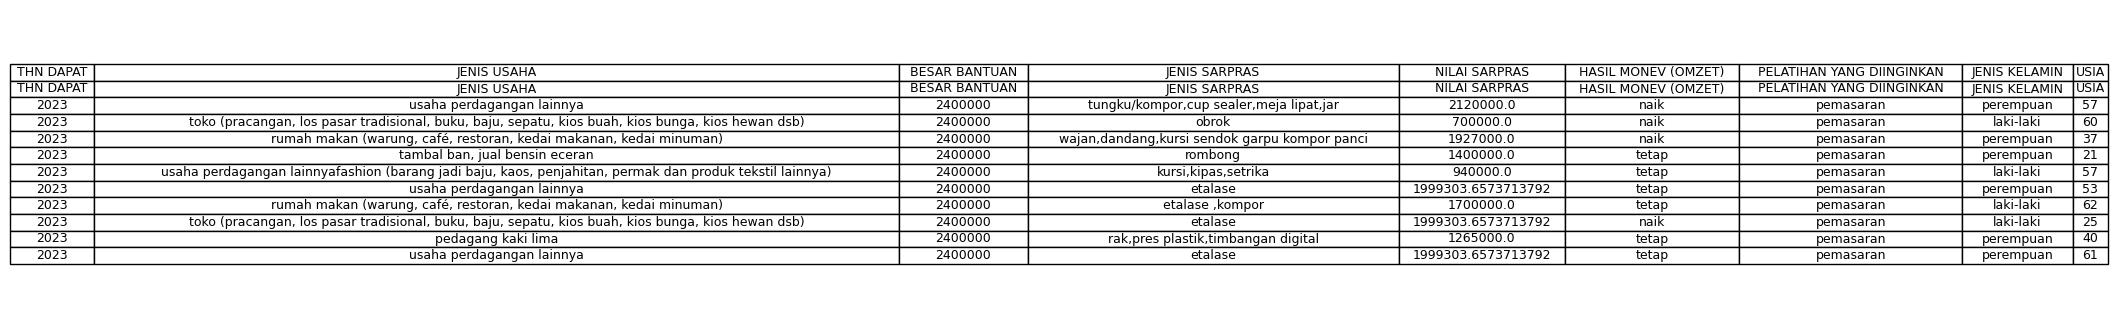

In [ ]:
import matplotlib.pyplot as plt

# Mengubah semua teks di kolom tertentu menjadi huruf kecil
columns_to_lower = ['JENIS SARPRAS', 'JENIS USAHA', 'HASIL MONEV (OMZET)', 'PELATIHAN YANG DIINGINKAN', 'JENIS KELAMIN']
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())

# Membuat visualisasi tabel
fig, ax = plt.subplots(figsize=(8, 4))

# Menyembunyikan sumbu
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Menampilkan tabel hasil perubahan
table_data = [df.columns.tolist()] + df.head(10).values.tolist()  # Menampilkan 10 baris pertama
table = ax.table(cellText=table_data, colLabels=df.columns, cellLoc='center', loc='center')

# Menyesuaikan tampilan tabel
table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([i for i in range(len(df.columns))])

plt.show()


perbaikan penulisan ejaan


In [ ]:
from difflib import get_close_matches

# Fungsi untuk memperbaiki ejaan menggunakan difflib
def perbaiki_ejaan(teks, all_kata):
    if isinstance(teks, str):  # Pastikan teks adalah string
        kata = teks.split()
        kata_perbaikan = []

        for k in kata:
            # Mencari kata terdekat
            matches = get_close_matches(k, all_kata, n=1)
            kata_perbaikan.append(matches[0] if matches else k)  # Ambil kata yang paling sesuai atau kata asli

        return ' '.join(kata_perbaikan)
    return teks  # Kembalikan nilai asli jika bukan string

# Ambil semua kata unik dari kolom 'JENIS SARPRAS'
all_kata = df['JENIS SARPRAS'].unique().tolist()
# Ambil semua kata unik dari kolom 'JENIS USAHA'
#all_kata = df['JENIS USAHA'].unique().tolist()
# Ambil semua kata unik dari kolom 'JENIS PELATIHAN'
#all_kata = df['PELATIHAN YANG DIINGINKAN'].unique().tolist()

# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))
# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
#df['JENIS USAHA'] = df['JENIS USAHA'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))
# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
#df['PELATIHAN YANG DIINGINKAN'] = df['PELATIHAN YANG DIINGINKAN'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))

# Tampilkan hasil
print(df[['JENIS SARPRAS']])
# Tampilkan hasil
#print(df[['JENIS USAHA']])
# Tampilkan hasil
#print(df[['PELATIHAN YANG DIINGINKAN']])


                                          JENIS SARPRAS
0      tabung gas, kompor, cup sealer, meja impact apr,
1                                                 obrok
2              wajan,meja,kursi seng lampu kompor panci
3                                               rombong
4                                   kursi,kipas,setrika
...                                                 ...
11988                                           etalase
11989                                           etalase
11990                                           etalase
11991                                           etalase
11992                                           etalase

[11993 rows x 1 columns]


kode untuk memisahkan kolom JENIS SARPRAS yang terdapat tanda koma

In [ ]:
# Menormalkan tanda koma dengan spasi tunggal setelah koma
#(menghapus spasi tambahan yang tidak diinginkan)
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].str.replace(r'\s*,\s*', ', ', regex=True)

# Memisahkan kolom 'JENIS SARPRAS' berdasarkan tanda koma (,)
df_split = df['JENIS SARPRAS'].str.split(',', expand=True)

print(df_split)


                  0            1                                 2     3   \
0      tungku/kompor   cup sealer                        meja lipat   jar   
1              obrok         None                              None  None   
2              wajan      dandang   kursi sendok garpu kompor panci  None   
3            rombong         None                              None  None   
4              kursi        kipas                           setrika  None   
...              ...          ...                               ...   ...   
11988        etalase         None                              None  None   
11989        etalase         None                              None  None   
11990        etalase         None                              None  None   
11991        etalase         None                              None  None   
11992        etalase         None                              None  None   

         4     5     6     7     8     9     10    11    12    13  
0      

# **EDA**

Import library untuk EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

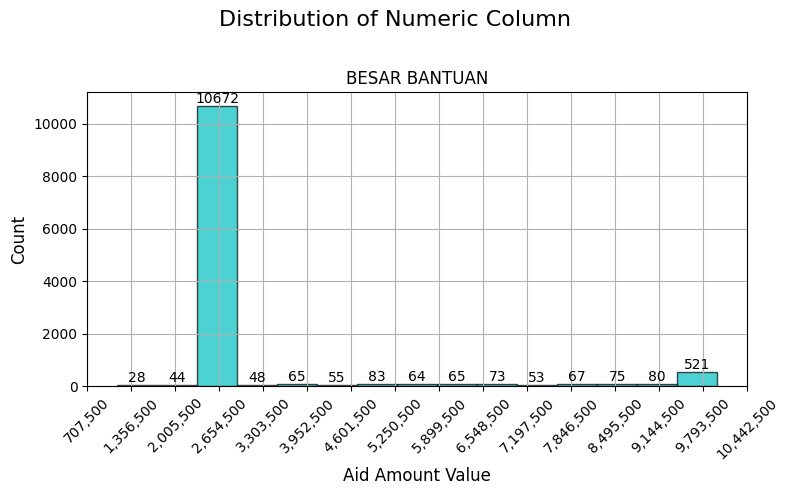

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# View the distribution of the numeric column like 'BESAR BANTUAN'
numeric_cols = ['BESAR BANTUAN']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Add x and y axis labels, and grid
for ax in axes.flatten():  # Iterate through all subplots
    ax.set_xlabel('Aid Amount Value', fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label

    # Display numbers above each bar
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only show labels if data exists
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Adjust X-axis tick labels for better readability
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# General title for all plots
plt.suptitle('Distribution of Numeric Column', fontsize=16)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap with title
plt.show()


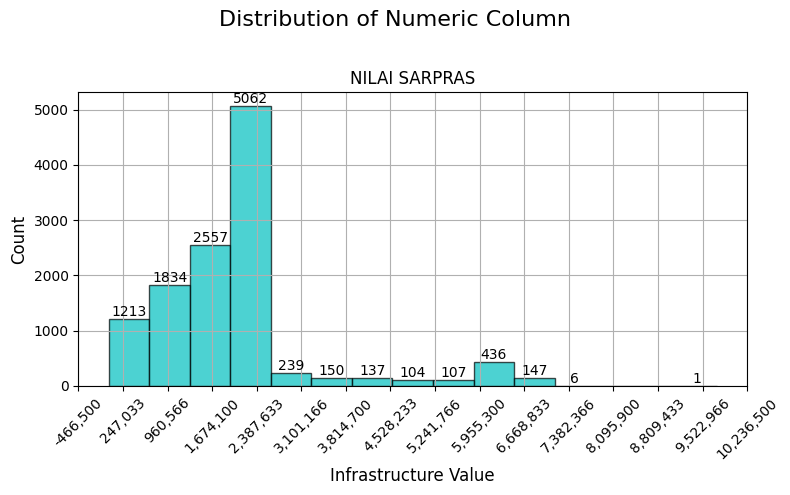

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# View the distribution of the numeric column like 'NILAI SARPRAS'
numeric_cols = ['NILAI SARPRAS']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Add x and y axis labels, and grid
for ax in axes.flatten():  # Iterate through all subplots
    ax.set_xlabel('Infrastructure Value', fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label

    # Display numbers above each bar
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only show labels if data exists
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Adjust X-axis tick labels for better readability
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# General title for all plots
plt.suptitle('Distribution of Numeric Column', fontsize=16)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap with title
plt.show()


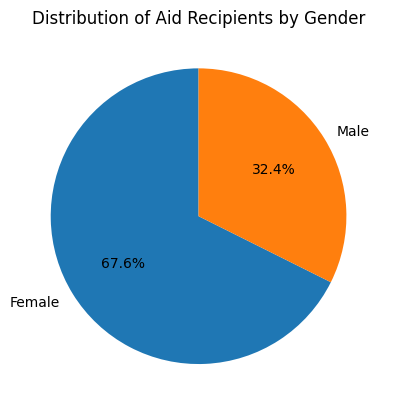

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping kategori dari bahasa Indonesia ke bahasa Inggris menggunakan map()
mapping_gender = {
    'Laki-laki': 'Male',
    'Perempuan': 'Female'
}
df['JENIS KELAMIN'] = df['JENIS KELAMIN'].map(mapping_gender)

# Hitung jumlah setiap kategori setelah perubahan
gender_counts = df['JENIS KELAMIN'].value_counts()

# Visualisasi pie chart dengan label bahasa Inggris
gender_counts.plot(kind='pie', labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Aid Recipients by Gender')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()


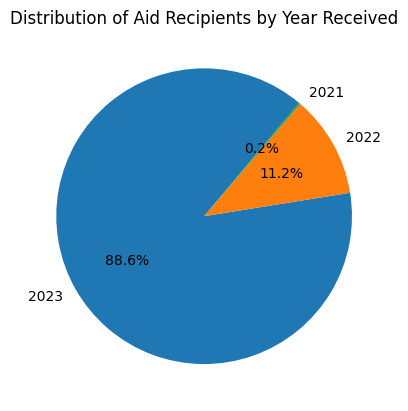

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah penerima berdasarkan tahun
year_counts = df['THN DAPAT'].value_counts()

# Visualisasi pie chart dengan label bahasa Inggris
year_counts.plot(kind='pie', labels=year_counts.index, autopct='%1.1f%%', startangle=50)

# Ubah judul menjadi bahasa Inggris
plt.title('Distribution of Aid Recipients by Year Received')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()


pada tahun 2023 kelompok usia 40-59 tahun lebih banyak menerima bantuan modal

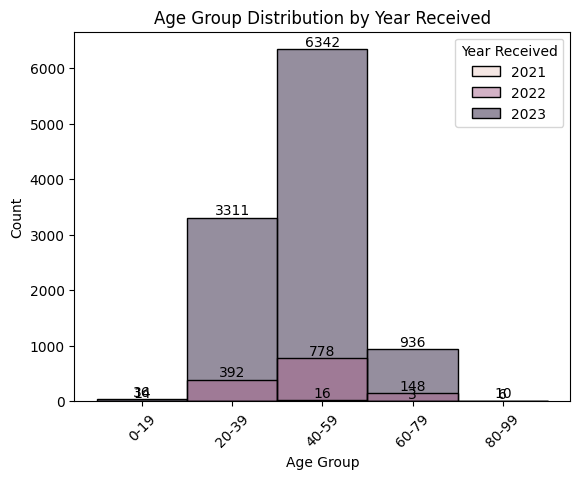

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age categories per 20 years
df['Age_Group'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

df.rename(columns={'THN DAPAT': 'Year Received'}, inplace=True)

# Create plot
ax = sns.histplot(data=df, x='Age Group', hue='Year Received')

# Add data count above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Adjust display
plt.title('Age Group Distribution by Year Received')
plt.xticks(rotation=45)
plt.show()


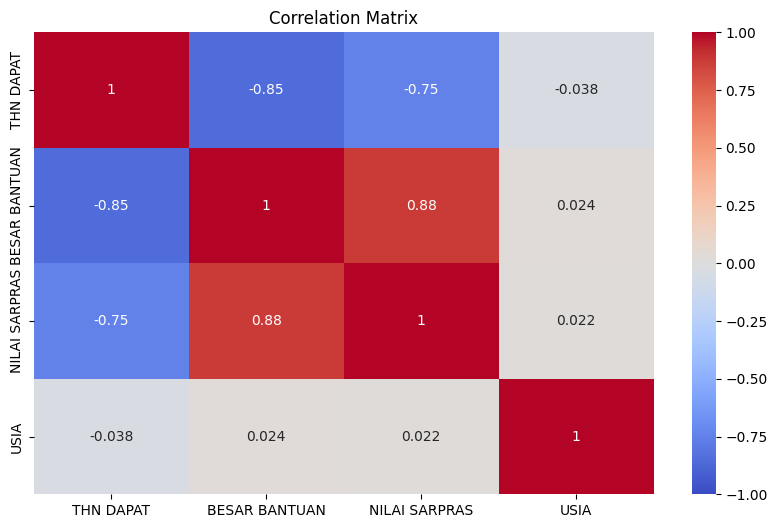

In [ ]:
# Misalkan df adalah DataFrame Anda
# Memilih hanya kolom numerik untuk menghitung korelasi
corr_matrix = df.select_dtypes(include=['number']).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))  # Ukuran heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

BOXPLOT DARI JENIS USAHA

standar devinisi adalah sama seperti bar eror

       Number of Businesses
count             16.000000
mean              30.625000
std               13.275918
min               10.000000
25%               20.000000
50%               30.000000
75%               36.250000
max               60.000000


<ipython-input-73-e38c721c795d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Category', y='Number of Businesses', palette='viridis')


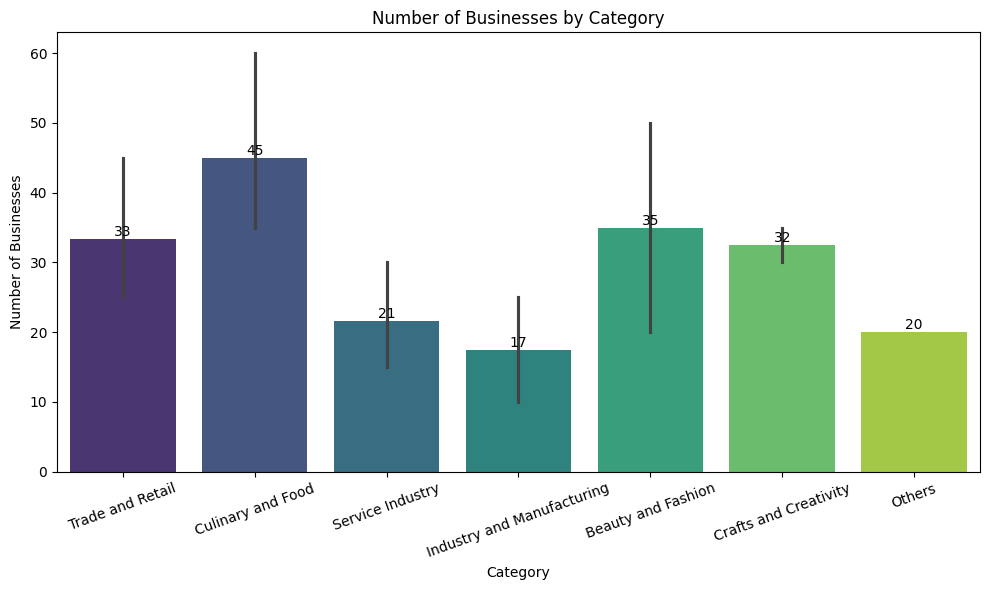

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Business category data
data = {
    'Category': [
        'Trade and Retail', 'Trade and Retail', 'Trade and Retail',
        'Culinary and Food', 'Culinary and Food', 'Culinary and Food',
        'Service Industry', 'Service Industry', 'Service Industry', 'Industry and Manufacturing',
        'Industry and Manufacturing', 'Beauty and Fashion', 'Beauty and Fashion',
        'Crafts and Creativity', 'Crafts and Creativity', 'Others'
    ],
    'Number of Businesses': [
        30, 45, 25, 40, 60, 35, 20, 30, 15, 25, 10, 50, 20, 35, 30, 20
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display basic information
print(df.describe())

# Visualization of the number of businesses by category
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Category', y='Number of Businesses', palette='viridis')

# Add data labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Update chart title and labels
plt.title('Number of Businesses by Category')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


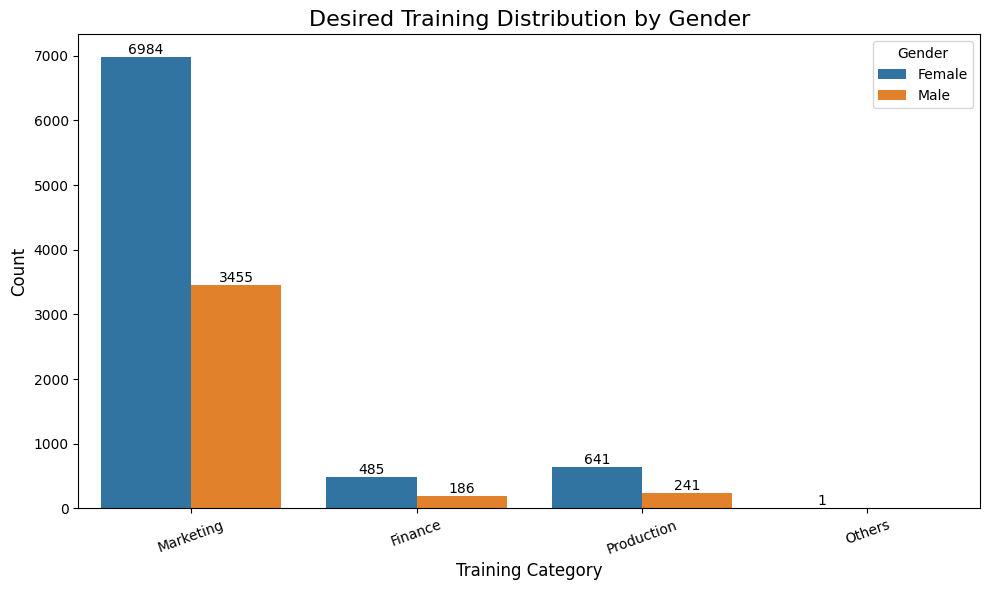

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize training types
def training_category(training):
    training = training.lower()  # Convert to lowercase for better matching
    if 'pemasaran' in training:
        return 'Marketing'
    elif 'keuangan' in training:
        return 'Finance'
    elif 'produksi' in training:
        return 'Production'
    elif 'kualitas' in training:
        return 'Production Quality'
    elif 'manajemen' in training:
        return 'Financial Management'
    else:
        return 'Others'

# Function to translate gender labels
def translate_gender(gender):
    gender_map = {
        'Laki-laki': 'Male',
        'Perempuan': 'Female'
    }
    return gender_map.get(gender, gender)  # Default to original if not found

# Apply the categorization function to the 'Desired Training' column
df['Training Category'] = df['PELATIHAN YANG DIINGINKAN'].apply(training_category)

# Apply gender translation
df['Gender'] = df['JENIS KELAMIN'].apply(translate_gender)

# Visualization of desired training distribution by gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Training Category', hue='Gender', data=df)

# Add data labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Update chart title and labels
plt.title('Desired Training Distribution by Gender', fontsize=16)
plt.xlabel('Training Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


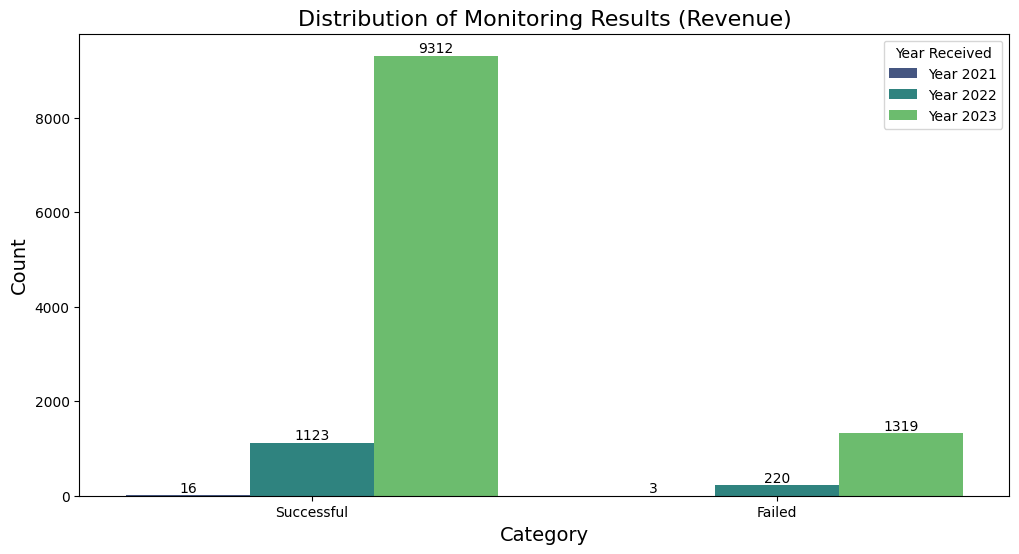

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghapus spasi ekstra di awal dan akhir
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Mengkategorikan hasil monev ke dalam bahasa Inggris
def categorize_result(value):
    if value in ['naik', 'tetap']:
        return 'Successful'
    else:
        return 'Failed'

# Menerapkan fungsi untuk membuat kolom kategori baru dalam bahasa Inggris
df['Category'] = df['HASIL MONEV (OMZET)'].apply(categorize_result)

# Konversi 'THN DAPAT' ke tipe numerik
df['THN DAPAT'] = pd.to_numeric(df['THN DAPAT'], errors='coerce')

# Filter hanya tahun 2021-2023
df = df[df['THN DAPAT'].between(2021, 2023)]

# Menerjemahkan tahun ke dalam format bahasa Inggris
df['Year Received'] = df['THN DAPAT'].astype(str).apply(lambda x: f'Year {x}')

# Mengurutkan Year Received dalam legenda
df['Year Received'] = pd.Categorical(df['Year Received'], categories=['Year 2021', 'Year 2022', 'Year 2023'], ordered=True)

# Visualisasi menggunakan Seaborn dengan hue 'Year Received'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Category', hue='Year Received', palette='viridis')

# Menyesuaikan tampilan
plt.title('Distribution of Monitoring Results (Revenue)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Year Received')

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan plot
plt.show()


Label Encoder untuk mengubah data kategorik menjadi numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['JENIS USAHA'] = le.fit_transform(df['JENIS USAHA'])
df['JENIS SARPRAS'] = le.fit_transform(df['JENIS SARPRAS'])
df['HASIL MONEV (OMZET)'] = le.fit_transform(df['HASIL MONEV (OMZET)'])
df['PELATIHAN YANG DIINGINKAN'] = le.fit_transform(df['PELATIHAN YANG DIINGINKAN'])
df['JENIS KELAMIN'] = le.fit_transform(df['JENIS KELAMIN'])
df['THN DAPAT'] = le.fit_transform(df['THN DAPAT'])

df.head()


,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
0,2,331,2400000,5166,2120000.0,2,14,1,57
1,2,302,2400000,3963,700000.0,2,14,0,60
2,2,262,2400000,5846,1927000.0,2,14,1,37
3,2,299,2400000,4711,1400000.0,3,14,1,21
4,2,332,2400000,3022,940000.0,3,14,0,57


Pemilihan Fitur

In [ ]:
features = ['JENIS SARPRAS', 'JENIS USAHA', 'THN DAPAT', 'BESAR BANTUAN', 'NILAI SARPRAS',
            'PELATIHAN YANG DIINGINKAN', 'JENIS KELAMIN', 'USIA']
X = df[features]
y = df['HASIL MONEV (OMZET)']

In [ ]:
X

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
0,5166,331,2,2400000,2120000.0,14,1,57
1,3963,302,2,2400000,700000.0,14,0,60
2,5846,262,2,2400000,1927000.0,14,1,37
3,4711,299,2,2400000,1400000.0,14,1,21
4,3022,332,2,2400000,940000.0,14,0,57
...,...,...,...,...,...,...,...,...
11988,1154,161,1,7410000,4850000.0,14,0,36
11989,1154,212,1,3950000,2500000.0,14,1,41
11990,1154,161,1,4730000,3000000.0,14,0,39
11991,1154,302,1,9950000,6500000.0,14,1,43


In [ ]:
y

,HASIL MONEV (OMZET)
0,2
1,2
2,2
3,3
4,3
...,...
11988,3
11989,3
11990,3
11991,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Training (Data Latih)

In [ ]:
X_train

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
8084,1280,302,2,2400000,1796000.0,13,1,54
7440,489,262,2,2400000,1105000.0,13,1,33
288,1928,280,2,2400000,1700000.0,0,1,40
4969,997,262,2,2400000,2020000.0,14,1,61
10000,1488,262,2,2400000,700000.0,13,0,61
...,...,...,...,...,...,...,...,...
11964,1154,161,1,5500000,3575000.0,14,0,24
5191,3963,304,2,2400000,500000.0,14,0,37
5390,2146,262,2,2400000,1000000.0,13,0,57
860,517,265,2,2400000,2210000.0,4,0,44


In [ ]:
y_train

,HASIL MONEV (OMZET)
8084,3
7440,3
288,4
4969,2
10000,3
...,...
11964,4
5191,4
5390,3
860,3


Data Test (data Uji)

In [ ]:
X_test

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
10414,427,262,2,2400000,1.063000e+06,13,0,53
1369,1510,262,2,2400000,2.083000e+06,13,1,29
1718,1154,262,2,2400000,1.999304e+06,13,1,62
8239,5129,262,2,2400000,1.800000e+05,21,1,44
360,4387,331,2,2400000,1.950000e+06,9,1,27
...,...,...,...,...,...,...,...,...
11121,1154,161,1,7000000,4.550000e+06,14,0,58
5465,555,158,2,2400000,2.008000e+06,14,1,42
3851,1154,204,2,2400000,1.999304e+06,21,1,19
3070,320,302,2,2400000,6.000000e+04,14,1,48


In [ ]:
y_test

,HASIL MONEV (OMZET)
10414,3
1369,2
1718,3
8239,3
360,3
...,...
11121,3
5465,3
3851,3
3070,3


# **Modeling**

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    max_depth=5,                 # Mengurangi kedalaman pohon
    max_features=8,              # Membatasi fitur yang dipertimbangkan di setiap split
    n_estimators=300,            # Jumlah pohon
    min_samples_split=5,         # Minimal sampel untuk melakukan split
    min_samples_leaf=5,          # Minimal sampel untuk leaf node
    random_state=42

)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [ ]:
# Menampilkan jumlah pohon dan rata-rata kedalaman pohon dalam Random Forest
num_trees = len(model.estimators_)
depths = [tree.tree_.max_depth for tree in model.estimators_]

print(f"Jumlah Pohon dalam Random Forest: {num_trees}")
print(f"Rata-rata Kedalaman Pohon: {sum(depths) / num_trees:.2f}")


Jumlah Pohon dalam Random Forest: 300
Rata-rata Kedalaman Pohon: 5.00


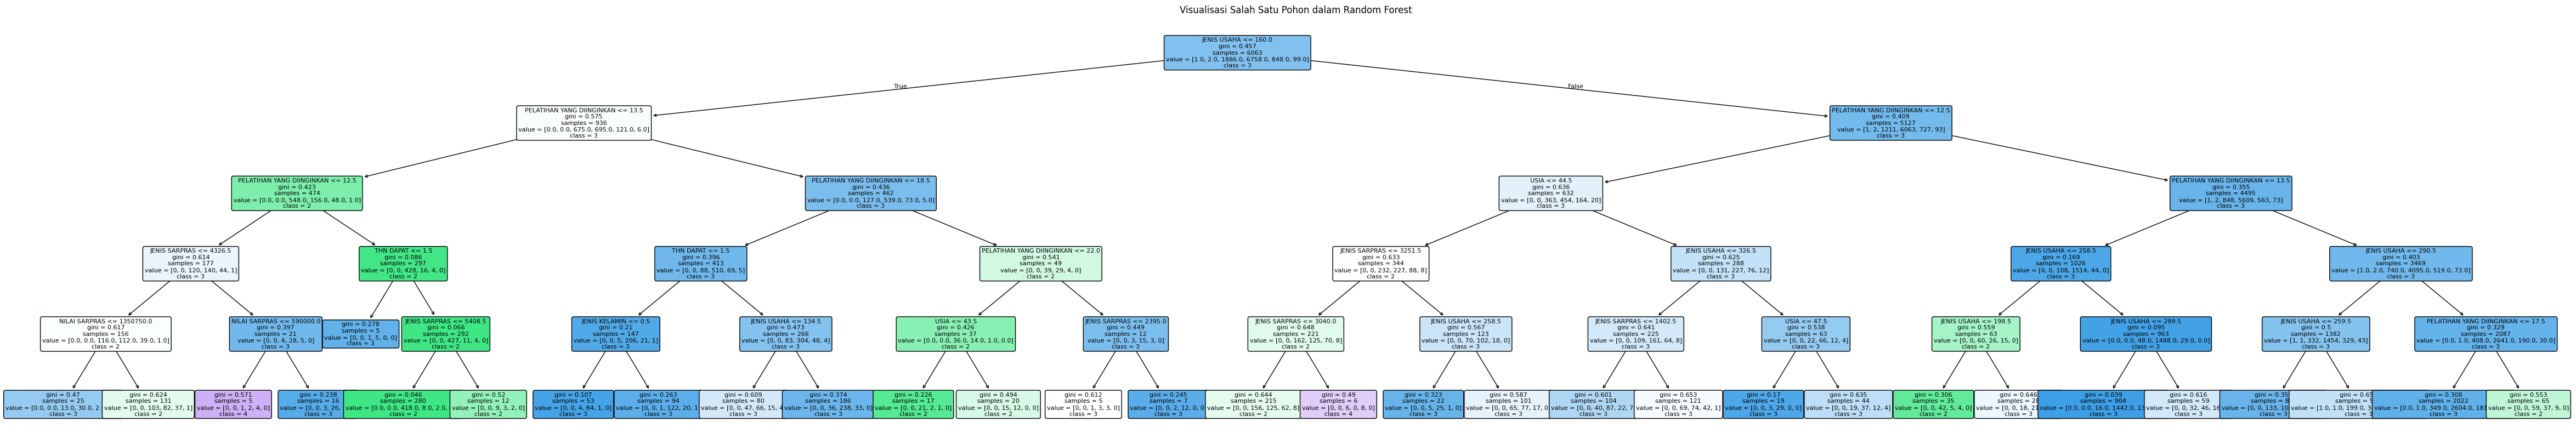

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Pastikan model sudah dilatih sebelum menjalankan kode ini
plt.figure(figsize=(60, 10))
plot_tree(model.estimators_[0],  # Pilih pohon pertama
          feature_names=X_train.columns,
          class_names=list(map(str, model.classes_)),
          filled=True, rounded=True, fontsize=8)

plt.title("Visualisasi Salah Satu Pohon dalam Random Forest")
plt.show()


# **Evaluasi**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation dengan 5 fold
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Cetak hasil cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2%}".format(np.mean(scores)))
print("Standard deviation: {:.2%}".format(np.std(scores)))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.71654856 0.76948729 0.75406419 0.74311927 0.7235196 ]
Mean accuracy: 74.13%
Standard deviation: 1.94%


untuk menilai performa dan kemampuan generalisasi model. Ini dilakukan dengan membagi dataset menjadi beberapa subset (folds) dan menjalankan proses pelatihan dan evaluasi beberapa kali agar hasil evaluasi lebih akurat dan tidak bias.

In [ ]:
# Prediksi pada data train dan test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cetak hasil akurasi
print(f'Akurasi Train: {train_accuracy:.2%}')
print(f'Akurasi Test: {test_accuracy:.2%}')

Akurasi Train: 75.96%
Akurasi Test: 74.95%


In [ ]:

# Evaluasi akurasi pada data latih dan data uji
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))

# Perbandingan akurasi untuk memeriksa overfitting
if train_accuracy > test_accuracy + 0.05:
    print("Model kemungkinan mengalami overfitting.")
else:
    print("Model memiliki generalisasi yang cukup baik.")

Train Accuracy: 75.96%
Test Accuracy: 74.95%
Model memiliki generalisasi yang cukup baik.


Prediksi data test menggunakan model random forest yang sudah dibangun

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
10414,3,3
1369,2,3
1718,3,3
8239,3,3
360,3,3
...,...,...
11121,3,3
5465,3,3
3851,3,3
3070,3,3


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0    0    1    0    0]
 [   0  170  330    0    0]
 [   0   30 1628    0    0]
 [   0   13  201    0    0]
 [   0    1   25    0    0]]


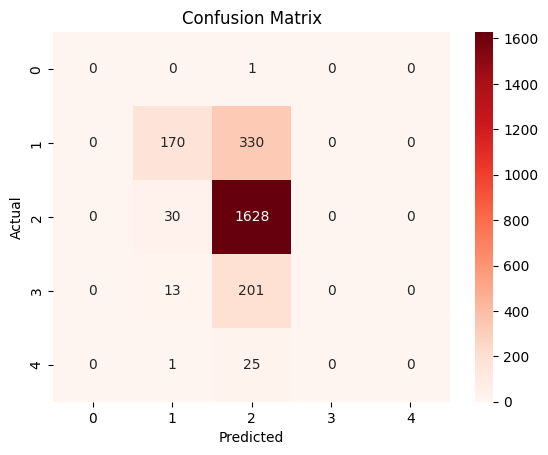

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RF: {accuracy:.2f}")

Accuracy RF: 0.75


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Sesuaikan dengan kebutuhan
recall = recall_score(y_test, y_pred, average='macro')

# Menampilkan hasil
print(f"Accuracy RF: {accuracy:.2f}")
print(f"Precision RF: {precision:.2f}")
print(f"Recall RF: {recall:.2f}")


Accuracy RF: 0.75
Precision RF: 0.31
Recall RF: 0.26


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,PELATIHAN YANG DIINGINKAN,0.499944
1,JENIS USAHA,0.437596
4,NILAI SARPRAS,0.016363
0,JENIS SARPRAS,0.014942
7,USIA,0.013731
2,THN DAPAT,0.010398
3,BESAR BANTUAN,0.005973
6,JENIS KELAMIN,0.001053


                     Feature  Importance
5  PELATIHAN YANG DIINGINKAN    0.499944
1                JENIS USAHA    0.437596
4              NILAI SARPRAS    0.016363
0              JENIS SARPRAS    0.014942
7                       USIA    0.013731
2                  THN DAPAT    0.010398
3              BESAR BANTUAN    0.005973
6              JENIS KELAMIN    0.001053


<ipython-input-106-207901149806>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


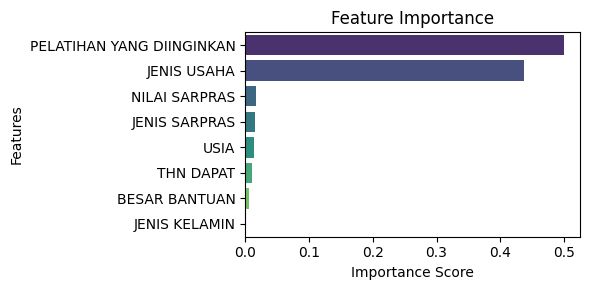

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Membuat dataframe untuk feature importance
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Mengurutkan feature importance secara descending
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Menampilkan dataframe feature importance
print(df_feature_importance)


# Visualisasi feature importance
plt.figure(figsize=(6, 3))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_feature_importance,
    palette='viridis'
)

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# **Classification Report**

In [ ]:

print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Feature Importance (pentingnya setiap fitur)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.34      0.48       500
           3       0.75      0.98      0.85      1658
           4       0.00      0.00      0.00       214
           5       0.00      0.00      0.00        26

    accuracy                           0.75      2399
   macro avg       0.31      0.26      0.26      2399
weighted avg       0.68      0.75      0.68      2399



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RandomForest: {accuracy:.2f}")

# Hitung presisi
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision RandomForest: {precision:.2f}")

# Hitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall RandomForest: {recall:.2f}")

# Hitung F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score RandomForest: {f1:.2f}")


Accuracy RandomForest: 0.75
Precision RandomForest: 0.68
Recall RandomForest: 0.75
F1 Score RandomForest: 0.68


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Balanced Accuracy**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)


Nilai balanced accuracy yang diperoleh akan memberikan indikasi seberapa baik model mengklasifikasikan semua kelas secara proporsional, terlepas dari distribusi data yang tidak seimbang.